# Apparent Temperature

##Problem Statement 
###This project is a programming assignment wherein you have to make an EDA report to analyse the factors affecting the apparent temperature given other weather variables in an hourly manner.

##Objectives:

###You are required to prepare a well-commented an interactive python notebook as your solution to this problem statement. The notebook must meet the following objectives:

###1. Clean the data and drop useless columns.
###2. Make an EDA report, i.e., perform a univariate and bivariate analysis. Also, derive new features based on the given features if necessary.
###3. Visualize the distributions of various features and correlations between them.

In [0]:


# import all packages and set plots to be embedded inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
# Loadind data

df = pd.read_csv('weather_data.csv')

## Variable Identification


In [25]:
df.shape

(5999, 12)

It looks like, we have 5999 records with 12 columns. lets look some of records of our data.

In [26]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
Formatted Date              5999 non-null object
Summary                     5999 non-null object
Precip Type                 5999 non-null object
Temperature (C)             5999 non-null float64
Apparent Temperature (C)    5999 non-null float64
Humidity                    5999 non-null float64
Wind Speed (km/h)           5999 non-null float64
Wind Bearing (degrees)      5999 non-null int64
Visibility (km)             5999 non-null float64
Loud Cover                  5999 non-null int64
Pressure (millibars)        5999 non-null float64
Daily Summary               5999 non-null object
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


In [28]:
# Categorical Variables

categorial = df.select_dtypes(include=['object']).keys()
print(categorial)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], dtype='object')


In [29]:
# Quantitative Variables

quatitative = df.select_dtypes(include=['int64','float64']).keys()
print(quatitative)

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')


We have to create more variables for hourly visualization 

In [0]:
# DateTime, Hour Formation

df['Date'] = pd.to_datetime(df['Formatted Date'], utc='true')
df['Hour'] = df['Date'].dt.hour

In [31]:
df.shape

(5999, 14)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 14 columns):
Formatted Date              5999 non-null object
Summary                     5999 non-null object
Precip Type                 5999 non-null object
Temperature (C)             5999 non-null float64
Apparent Temperature (C)    5999 non-null float64
Humidity                    5999 non-null float64
Wind Speed (km/h)           5999 non-null float64
Wind Bearing (degrees)      5999 non-null int64
Visibility (km)             5999 non-null float64
Loud Cover                  5999 non-null int64
Pressure (millibars)        5999 non-null float64
Daily Summary               5999 non-null object
Date                        5999 non-null datetime64[ns, UTC]
Hour                        5999 non-null int64
dtypes: datetime64[ns, UTC](1), float64(6), int64(3), object(4)
memory usage: 656.2+ KB


We have to check for the null values. If null values are present then we have remove it.

In [33]:
df.isna().any()

Formatted Date              False
Summary                     False
Precip Type                 False
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
Date                        False
Hour                        False
dtype: bool

In [34]:
round(100*(df.isnull().sum()/len(df.index)),2)

Formatted Date              0.0
Summary                     0.0
Precip Type                 0.0
Temperature (C)             0.0
Apparent Temperature (C)    0.0
Humidity                    0.0
Wind Speed (km/h)           0.0
Wind Bearing (degrees)      0.0
Visibility (km)             0.0
Loud Cover                  0.0
Pressure (millibars)        0.0
Daily Summary               0.0
Date                        0.0
Hour                        0.0
dtype: float64

There is no any null values. We will proceed further exploration.




## Data Exploration


## 1. Univariate Analysis


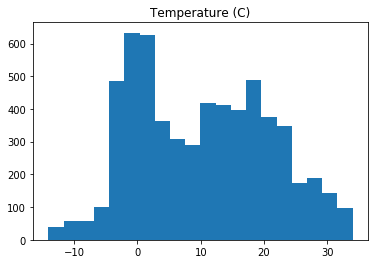

In [69]:
plt.title('Temperature (C)')
plt.hist(x = 'Temperature (C)', bins =20, data = df)
plt.show()

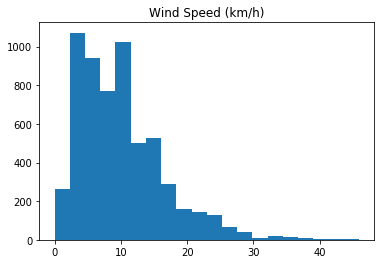

In [46]:
plt.title('Wind Speed (km/h)')
plt.hist(x = 'Wind Speed (km/h)', bins =20, data = df)
plt.show()

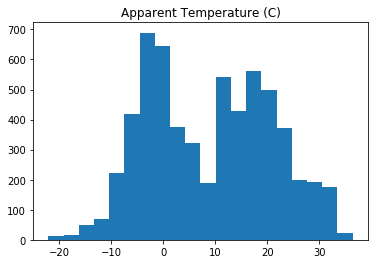

In [47]:

plt.title('Apparent Temperature (C)')
plt.hist(x = 'Apparent Temperature (C)', bins =20, data = df)
plt.show()

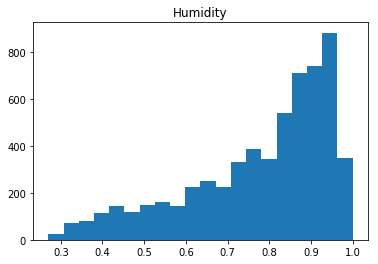

In [62]:
plt.title('Humidity')
plt.hist(x = 'Humidity',bins =20,data = df)
plt.show()

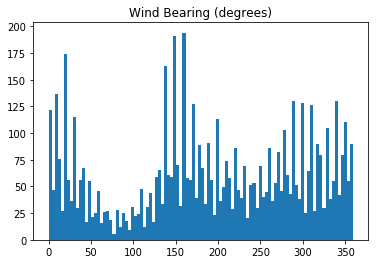

In [59]:
plt.title('Wind Bearing (degrees)')
plt.hist(x = 'Wind Bearing (degrees)',bins =100,data = df)
plt.show()


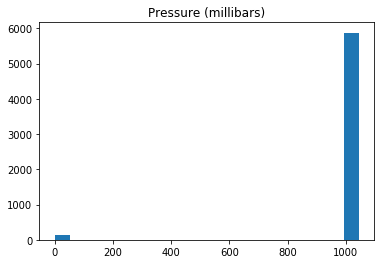

In [60]:
plt.title('Pressure (millibars)')
plt.hist(x = 'Pressure (millibars)',bins =20,data = df)
plt.show()

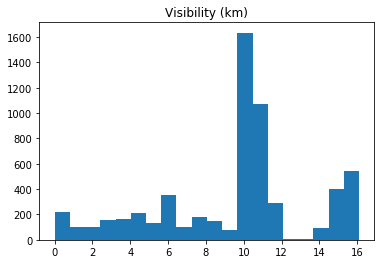

In [70]:
plt.title('Visibility (km)')
plt.hist(x = 'Visibility (km)',bins =20,data = df)
plt.show()

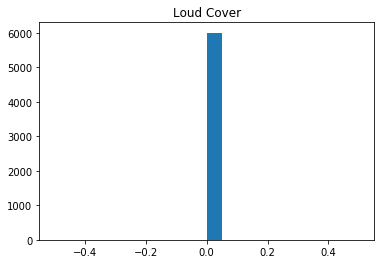

In [71]:
plt.title('Loud Cover')
plt.hist(x = 'Loud Cover',bins =20,data = df)
plt.show()

Loud Cover takes values as Zero. So, we will remove it.

In [0]:
df=df.drop('Loud Cover',axis=1)

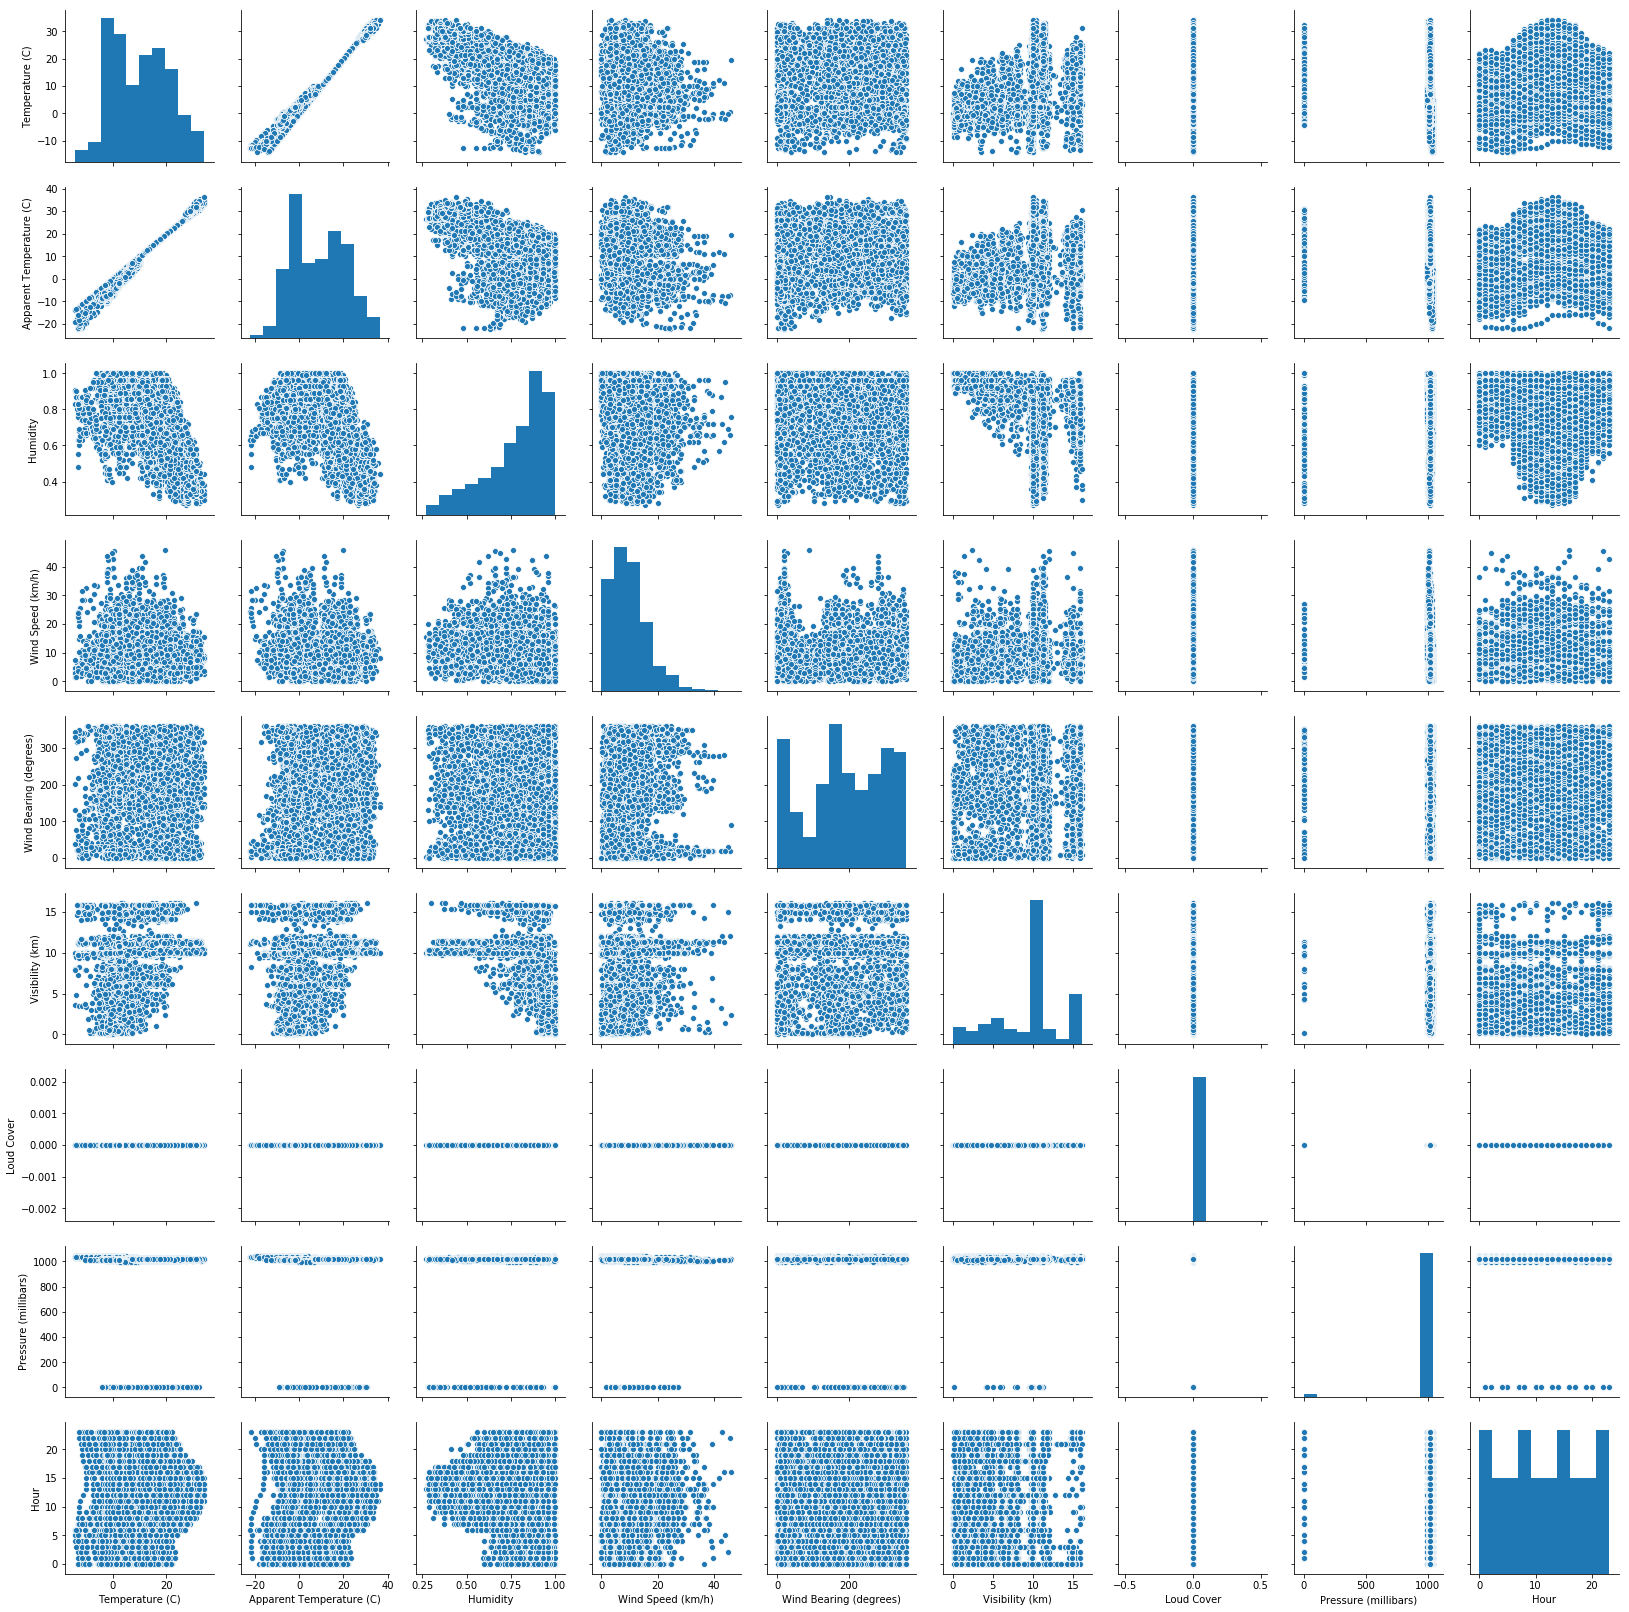

In [64]:
sns.pairplot(df)
plt.show()